# The QuAM

#### We return to our question: Can we predict the pricing of a property, given different information about it?
In other words, given feature values x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>n</sub>, can we find some relation 
y = w<sub>0</sub> + w<sub>1</sub>\*x<sub>1</sub> + ... + w<sub>n</sub>\*x<sub>n</sub> ?

We carry out different classification tests on our data. We will run through a couple different classifiers and see which is best suited for the data.

In [1]:
# Reading in the csv file

import pandas as pd

data = pd.read_csv("data_clean.csv")

features = data.iloc[:, 0:-1]
targets = data.iloc[:, -1]

data

,Size,Bedrooms,Bathrooms,Nr of amenities,Balcony,Built in Wardrobes,Maids Room,Private Garden,Type_Apartment,Type_Compound,...,Location_Salwa Road,Location_The Pearl,Location_Umm Al Seneem,Location_Umm Ghuwailina,Location_Umm Salal Ali,Location_Umm Salal Mohammad,Location_Wadi Al Sail,Location_West Bay,Location_West Bay Lagoon,Value
0,60.0,1,1,8,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,6500.0
1,62.0,1,1,8,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,7000.0
2,60.0,1,1,9,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,6700.0
3,61.0,1,1,10,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,6500.0
4,60.0,1,1,10,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,7500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6575,700.0,9,7,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,35000.0
6576,680.0,8,6,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30000.0
6577,400.0,8,7,5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,15000.0
6578,375.0,8,8,5,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,18000.0


## Process Iterations

### First Iteration: Linear Regression

#### Solution justification

We assume that some linear relationship between the features exists, and begin with a basic learning algorithm, namely Linear Regression. Based on its accuracy in prediction and finding a linear relationship between the variables, we determine whether this is a good solution and continue accordingly.  

(All **Solution Details** to be found as comments within the code)

In [2]:
# Splitting data into training and testing

from sklearn.model_selection import train_test_split

features = features
targets = targets

# We split the data into 25% for testing and 75% for training,
# for a good ratio between learning and testing
test_size = 0.25

# Splitting the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(features.values, 
                                                    targets.values, 
                                                    test_size=test_size,
                                                    random_state=99)

In [3]:
# Training the Linear model

from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
import numpy as np

# Fitting and predicting on the model
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 
Y_pred = regressor.predict(X_test)

# Measuring the accuracy of the model
linear_train_acc = regressor.score(X_train, Y_train)
linear_test_acc = regressor.score(X_test, Y_test)

print("Root Mean squared error =", round(np.sqrt(sm.mean_squared_error(Y_test, Y_pred)), 2)) 
print("R2 score on train =", linear_train_acc)
print("R2 score on test =", linear_test_acc)

Root Mean squared error = 4750.12
R2 score on train = 0.5837615311767284
R2 score on test = 0.5453961995206947


#### Lessons Learned  

Results obtained:
- R2 score for train: ~0.6
- R2 score for test: ~0.55
- RMSE: ~4754

These results tell us that around 60% of the variation in the labels can be predicted by the model. We can see this in the plot used above.  
This is indeed the majority of the labels, but perhaps - using a more complex model - we can do better than 60%.

### Second Iteration: Polynomial Regression

#### Solution Justification

We see that the coefficient of determination returned could be improved upon. To do this, we try a polynomial regression model. Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. We think this might be a better approach than linear regression because our feature's values vary a lot (sqm (size) vs nr of bedrooms vs bool for maids room).

(All **Solution Details** to be found as comments within the code)

In [4]:
# Training the Polynomial model

from sklearn.preprocessing import PolynomialFeatures

# We use degree=2 because any higher degree was not able to run on our machines (huge nr of features)
d = 2

# Fitting the polynomial features
poly = PolynomialFeatures(degree=d)
X_poly = poly.fit_transform(features) 

# Splitting the new polynomial features into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, 
                                                targets.values, 
                                                test_size=test_size,
                                                random_state=99)

# Fitting and Predicting on the new data
poly.fit(X_train, Y_train) 
lin2 = LinearRegression() 
lin2.fit(X_train, Y_train)
Y_pred = lin2.predict(X_test)

# Measuring the accuracy of the model
poly_train_acc = lin2.score(X_train, Y_train)
poly_test_acc = lin2.score(X_test, Y_test)

print("\nPoly with degree", d)
print("Root Mean squared error =", round(np.sqrt(sm.mean_squared_error(Y_test, Y_pred)), 2)) 
print("R2 score on train = {:.3f}".format(poly_train_acc))
print("R2 score on test = {:.3f}".format(poly_test_acc))


Poly with degree 2
Root Mean squared error = 58718000689.77
R2 score on train = 0.697
R2 score on test = -69465066127035.328


#### Lessons Learned  

Best result obtained:
- R2 score for train: ~0.7
- (R2 score for test: ~-69465066127035)
- RMSE: ~58718000690

These results tell us that our model can predict the training data with an ccuracy of 70%, but we see that the testing data does not do well at all.
This was a better approach than a simple linear regression model for the training data, however we are still not at a great accuracy. We think that a more complex model, that could filter through features e.g. Decision Tree model more useful.

### Third Iteration: Decision Tree Regression

#### Solution Justification

To improve our accuracy we will try an approach with Decision Trees. Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. This seems like a good solution for us because we have many features and we think that some of the features values really determine the target's range, therefore a tree with decision splits dependent on the features would be smart. 
<linebreak/>


#### Solution Details

We chose to not limit the max_depth _at first_.

In [5]:
# We split the data into 25% for testing and 75% for training,
# for a good ratio between learning and testing
test_size = 0.25

# Splitting the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(features.values, 
                                                    targets.values, 
                                                    test_size=test_size,
                                                    random_state=99)

In [6]:
# Training the DT model

from sklearn.tree import DecisionTreeRegressor

# Fitting the DT model
tree = DecisionTreeRegressor()
tree.fit(X_train, Y_train)

Y_pred = tree.predict(X_test)
print("\nDT with unbounded max depth")
print("Root Mean squared error =", round(np.sqrt(sm.mean_squared_error(Y_test, Y_pred)), 2)) 
print("R2 score on train =", tree.score(X_train, Y_train)) 
print("R2 score on train =", tree.score(X_test, Y_test))


DT with unbounded max depth
Root Mean squared error = 5897.4
R2 score on train = 0.9969819269210263
R2 score on train = 0.2992796363876601


**Are we overfitting?**

In [7]:
n_labels = tree.get_n_leaves()
print('Number of leaves / labels in the DT: {}'.format(n_labels))

Number of leaves / labels in the DT: 3229


In [8]:
import matplotlib.pyplot as plt

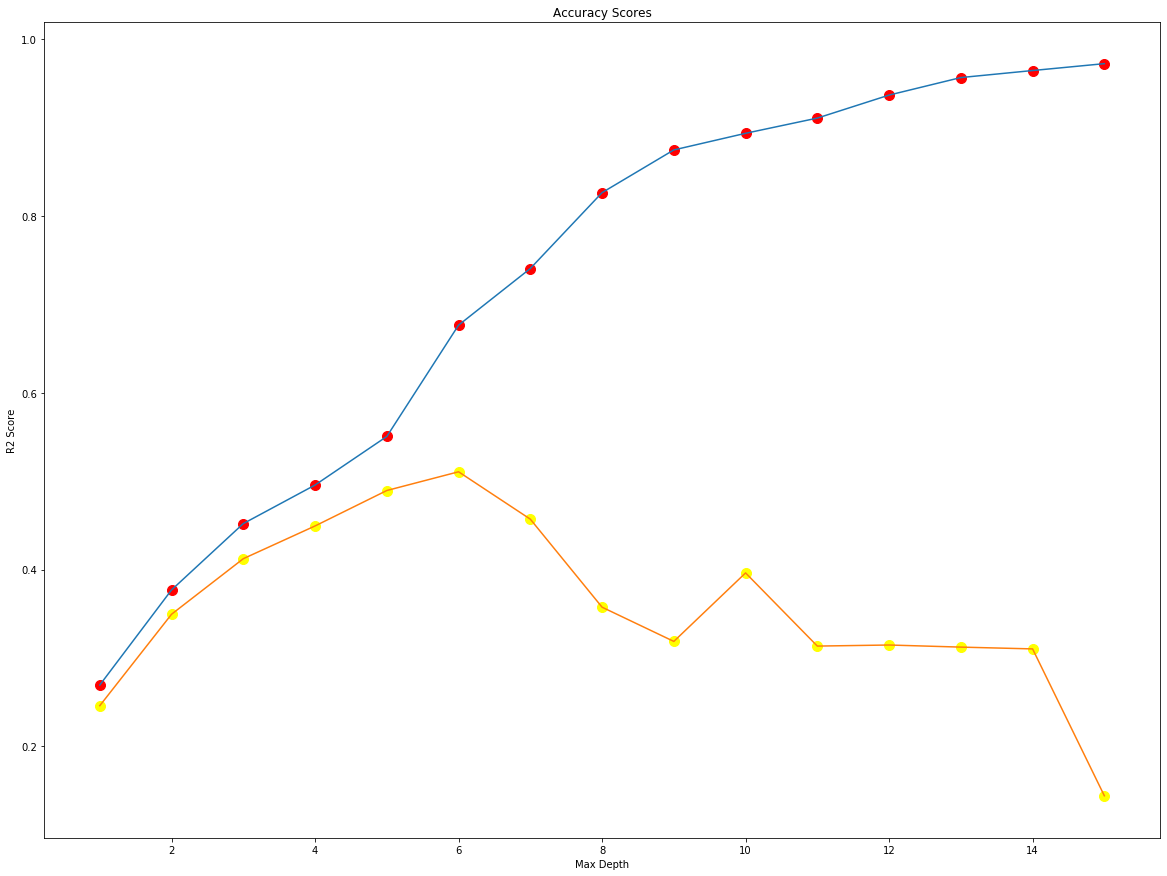

In [9]:
tree_training_accuracies = []
tree_test_accuracies = []

max_depth = list(range(1,16))
max_depth.append(None)
for d in max_depth:
    tree = DecisionTreeRegressor(max_depth=d)
    tree.fit(X_train, Y_train)
    Y_pred = tree.predict(X_test)
    acc_train = tree.score(X_train, Y_train)
    acc_test = tree.score(X_test, Y_test)
    tree_training_accuracies.append(acc_train)
    tree_test_accuracies.append(acc_test)

fig = plt.figure('ref', figsize=(20, 15))
data_plt = fig.add_subplot(1,1,1)

data_plt.plot(max_depth, tree_training_accuracies)
data_plt.scatter(max_depth, tree_training_accuracies, c='red', s=100)

data_plt.set_xlabel('Max Depth')
data_plt.set_ylabel('R2 Score')
data_plt.set_title('Accuracy Scores')

data_plt.plot(max_depth, tree_test_accuracies)
data_plt.scatter(max_depth, tree_test_accuracies, c='yellow', s=100)

plt.show()

As we can see from this graph above, the high/unbounded max depth values give the training data a perfect accuracy, however our testing data does not do very well then (which means we did overfit when training the model with anunbounded depth). So, we see that the best accuracy score for testing is at max depths of 5 or 6 - where the R2 score is  ~0.5 - so we should choose those as max depths for a general model.

In [10]:
tree_train_acc = tree_training_accuracies[6]
tree_test_acc = tree_test_accuracies[6]

print("Best R2 score on train =", tree_train_acc) 
print("Best R2 score on test =", tree_test_acc)

Best R2 score on train = 0.7407029086033885
Best R2 score on test = 0.4570987734425682


#### Lessons Learned  

Best result obtained:
- R2 score for train: ~0.75
- R2 score for test: ~0.45

These results tell us that even with the optimal depth for a generalized DT regression model, this one is doing worse at predicting the targets than a simple Linear Regression model.

## Summary

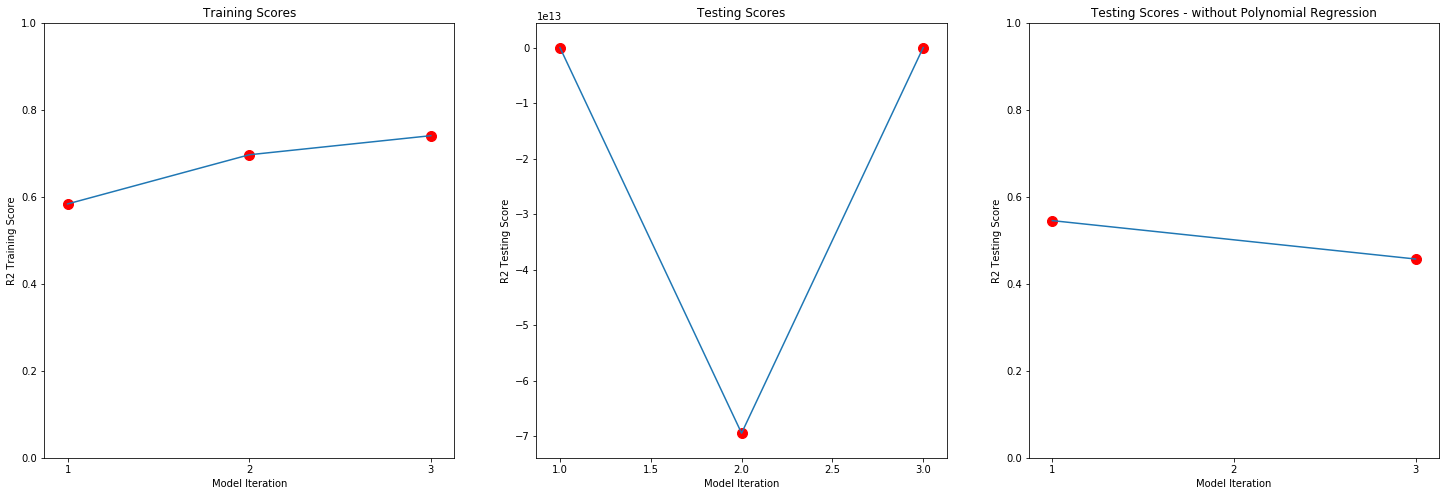

In [11]:
training_accuracies = [linear_train_acc, poly_train_acc, tree_train_acc]
test_accuracies = [linear_test_acc, poly_test_acc, tree_test_acc]

fig, data_plt = plt.subplots(nrows=1, ncols=3, figsize=(25,8))

data_plt[0].axis(ymin=0,ymax=1)
data_plt[0].set_xticks([1, 2, 3])
data_plt[2].axis(ymin=0,ymax=1)
data_plt[2].set_xticks([1, 2, 3])

data_plt[0].plot([1,2,3], training_accuracies)
data_plt[0].scatter([1,2,3], training_accuracies, c='red', s=100)

data_plt[0].set_xlabel('Model Iteration')
data_plt[0].set_ylabel('R2 Training Score')
data_plt[0].set_title('Training Scores')

data_plt[1].plot([1,2,3], test_accuracies)
data_plt[1].scatter([1,2,3], test_accuracies, c='red', s=100)

data_plt[1].set_title('Testing Scores')
data_plt[1].set_xlabel('Model Iteration')
data_plt[1].set_ylabel('R2 Testing Score')

# We remove polynomial testing scores, as it is an outlier
test_acc_clean = [linear_test_acc, tree_test_acc]
data_plt[2].plot([1,3], test_acc_clean)
data_plt[2].scatter([1,3], test_acc_clean, c='red', s=100)

data_plt[2].set_title('Testing Scores - without Polynomial Regression')
data_plt[2].set_xlabel('Model Iteration')
data_plt[2].set_ylabel('R2 Testing Score')


plt.show()

By looking at the graphs above, we decide to choose the Linear Regression model for our QuAM software because it is the best generalized predictor since it has the best R2 score for the testing data.

### Future improvements

#### What have we learnt about the real-estate market in Qatar?

When looking at the factors that determine rental price of properties in the Qatari market, we have found that some factors are much more important than others. This is mostly true of Amenities offered, which seem only to grow in number when other, more important, factors increase - namely Bedrooms, Bathrooms, Size, availability of Maids' rooms, and Location, in that order. 

Given that the relationship found, however, is only around 55% accurate, we also conclude that prices do have a random element to them as well, such that a definite relationship in all the variables may not completely exist. This "human" element may explain the variance in the true labels.

#### What could we do in the future to get even better accuracies? Why?

Revealuating the importance of the features was something we would have liked to do, given more time.  
Also, cleaning of the features was sometimes done in ways that were not very structured or systematic, and we would like to improve upon that.   
We would also like to improve upon our models and their accuracies, by trying different paramaters and having cleaner, more optimized, data.